# ML MODELS FOR EMG CLASSIFICATION

# Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
# Importing the train_set
train_dataset = pd.read_csv('trainset_60.csv')
X_train = train_dataset.iloc[:, :-1].values
y_train = train_dataset.iloc[:, -1].values

In [3]:
# Importing the dev_set
dev_dataset = pd.read_csv('validate_20.csv')
X_dev = dev_dataset.iloc[:, :-1].values
y_dev = dev_dataset.iloc[:, -1].values

In [4]:
# Importing the test_set
test_dataset = pd.read_csv('testset_20.csv')
X_test = test_dataset.iloc[:, :-1].values
y_test = test_dataset.iloc[:, -1].values

# Feature Scaling

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_dev = sc.fit_transform(X_dev)
X_test = sc.transform(X_test)

# Dataset Analysis

In [6]:
print(X_train)

[[-1.90815765 -2.07145225 -1.65976075 ...  0.28777429  0.10169213
  -1.28297814]
 [-1.54060044 -1.75309426 -1.23159258 ...  0.48136172 -0.06873272
  -1.59648631]
 [-1.57129911 -2.08981807 -1.46895219 ...  0.27404184 -0.73910521
  -0.12443136]
 ...
 [ 2.13391584  1.78339061  2.18649685 ... -0.3352874   0.51414358
  -1.78324017]
 [ 1.67669939  1.44978949  1.9996626  ...  0.09095603  0.40732187
  -1.40817977]
 [ 1.67393146  1.64460677  2.12679152 ...  0.09353653  0.32284431
  -2.13229583]]


In [7]:
print(X_dev)

[[-1.61878804 -1.96346788 -1.51493239 ...  0.42753289 -0.58065494
  -1.47258398]
 [-1.11283496 -2.08258309 -1.4206058  ...  0.42297098 -0.13847814
  -0.29632955]
 [-0.91098495 -1.98802451 -1.42193222 ...  0.29841291  0.37169066
  -0.88285218]
 ...
 [ 1.87246561  2.00294689  2.3221959  ... -0.08439382  0.33340883
  -2.70096261]
 [ 1.64101472  1.78724614  2.54077962 ... -0.55195137  0.22116299
  -1.68610678]
 [ 1.59631904  1.61827611  2.17404237 ... -0.06295117  0.25410034
  -1.93063644]]


In [8]:
print(X_test)

[[-0.91792421 -1.83075678 -1.4311876  ...  0.20600426  0.34229093
  -1.17610739]
 [-0.84517292 -1.92407844 -1.40438908 ...  0.25326965 -0.85664689
  -1.03121374]
 [-1.35877182 -2.07581788 -1.40230985 ...  0.43330661 -0.30244812
  -1.47309306]
 ...
 [ 1.61851352  1.40961467  2.12820158 ...  0.03408372  0.15318471
  -2.18941563]
 [ 1.66925428  1.64115399  2.33362096 ... -0.31589099  0.55278223
  -2.17871956]
 [ 1.9255842   1.62686538  2.61796835 ...  0.08216561  0.47762526
  -1.65086725]]


In [9]:
np.shape(X_train)

(19776, 42)

In [10]:
np.shape(X_dev)

(7040, 42)

In [11]:
np.shape(X_test)

(7040, 42)

In [12]:
np.shape(y_train)

(19776,)

In [13]:
y_train

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

In [14]:
np.shape(y_dev)

(7040,)

In [15]:
np.shape(y_test)

(7040,)

In [16]:
y_test

array([1, 1, 1, ..., 8, 8, 8], dtype=int64)

# 1. SVM Classifier

# MODEL TUNING

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Set the parameters by cross-validation
tuned_parameters = [{'C': [1,10,100,1000], 'kernel': ['rbf'],'gamma': ['scale','auto', 0.00001, 0.0001, 0.001]},
             {'C': [1,10,100,1000], 'kernel': ['linear']},
             {'C': [1,10,100,1000], 'kernel': ['poly'],'degree': [2,3,5],'gamma': ['scale', 'auto', 0.00001, 0.0001, 0.001]},
             {'C': [1,10,100,1000], 'kernel': ['sigmoid'],'gamma': ['scale', 'auto', 0.00001, 0.0001, 0.001]}             
             ]

print("# Tuning hyper-parameters for SVC")
print()

clf = GridSearchCV(SVC(random_state = 0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for SVC

Best parameters set found on training set:

{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

Grid scores on training set:

0.771 (+/-0.064) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.771 (+/-0.063) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.355 (+/-0.095) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.728 (+/-0.012) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.756 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.775 (+/-0.068) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.775 (+/-0.068) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.728 (+/-0.013) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.754 (+/-0.029) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.769 (+/-0.009) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.778 (+/-0.073) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.779 (+/-0.073) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.754 (+/-0.029) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.76

In [17]:
#model was tuned to check for best params and it was found that among all the Kernels checked the rbf kernel 
#had the best accuracy while predicting on Development set
#Best parameters set found on development set:
          #{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}

# Modified Training Set

In [18]:
#TRAINING DATA(for final model): X_train_ovr: X_train + X_dev, y_train_ovr=y_train+y_dev
#TEST DATA: X_test,y_test
X_train_ovr = np.concatenate((X_train,X_dev),0)
y_train_ovr = np.concatenate((y_train,y_dev),0)

In [19]:
np.shape(X_train_ovr)

(26816, 42)

In [20]:
np.shape(y_train_ovr)

(26816,)

# Training with tuned parameters

In [21]:
# Training the Kernel SVM model on the Training set
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'rbf', C = 100, gamma= 'auto', class_weight = 'balanced', random_state = 0)
classifier_SVM.fit(X_train_ovr, y_train_ovr)

SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Predicting results for Test Set

In [22]:
# Predicting the Test set results
y_results_SVM = classifier_SVM.predict(X_test)

In [23]:
print(np.concatenate((y_results_SVM.reshape(len(y_results_SVM),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

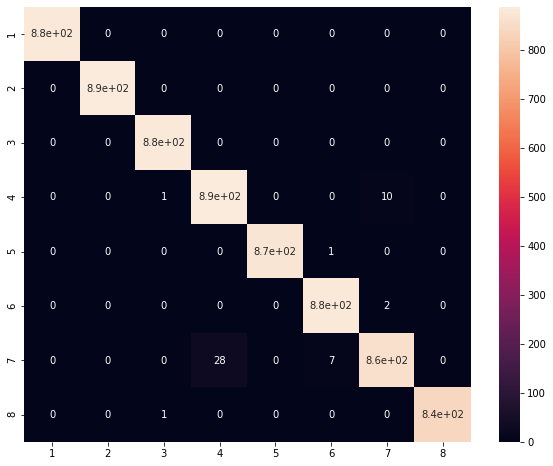

In [24]:
#Cross Validation metrics
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_svm = confusion_matrix(y_test, y_results_SVM)
array = cm_svm 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [25]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_svm = accuracy_score(y_test, y_results_SVM)
print("accuracy:{}".format(accuracy_svm))

#F1 score    
f1_score_svm = f1_score(y_test, y_results_SVM, average='weighted')
print("f1_score:{}".format(f1_score_svm))

#Recall score
recall_score_svm = recall_score(y_test, y_results_SVM, average='micro')
print("recall_score:{}".format(recall_score_svm))

#Precision score
precision_score_svm = precision_score(y_test, y_results_SVM, average='micro')
print("precision_score:{}".format(precision_score_svm))

accuracy:0.9928977272727273
f1_score:0.9928829094093914
recall_score:0.9928977272727273
precision_score:0.9928977272727273


In [26]:
#classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SVM, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  1.00000000 1.00000000 1.00000000       888
           3  0.99772727 1.00000000 0.99886234       878
           4  0.96936543 0.98773690 0.97846494       897
           5  1.00000000 0.99885584 0.99942759       874
           6  0.99100112 0.99773499 0.99435666       883
           7  0.98628571 0.96102450 0.97349126       898
           8  1.00000000 0.99881376 0.99940653       843

    accuracy                      0.99289773      7040
   macro avg  0.99304744 0.99302075 0.99300116      7040
weighted avg  0.99293521 0.99289773 0.99288291      7040



# 2. SGD Classifier

# Model Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

# Set the parameters by cross-validation
tuned_parameters = [{"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["hinge"],"penalty" : ["l2", "l1"],
                     "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["log"], "penalty" : ["l2", "l1"],
                    "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["perceptron"],"penalty" : ["l2", "l1"],
                    "max_iter" : [ 1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["squared_hinge"],"penalty" : ["l2", "l1"],
                    "max_iter" : [1000]},
                    {"alpha" : [0.0001, 0.001, 0.01, 0.1], 'loss': ["modified_huber"],"penalty" : ["l2", "l1"],
                    "max_iter" : [1000]}]

print("# Tuning hyper-parameters for SGD Classifier")
print()

clf = GridSearchCV(SGDClassifier(random_state = 0), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for SGD Classifier



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\user\anaconda3\lib\site-packages\sk

Best parameters set found on training set:

{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}

Grid scores on training set:

0.714 (+/-0.024) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.791 (+/-0.025) for {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.724 (+/-0.028) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.785 (+/-0.010) for {'alpha': 0.001, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.751 (+/-0.033) for {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.715 (+/-0.074) for {'alpha': 0.01, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.791 (+/-0.020) for {'alpha': 0.1, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2'}
0.433 (+/-0.051) for {'alpha': 0.1, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l1'}
0.715 (+/-0.025) for {'alpha': 0.0001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l2'}
0.786 (+/-0.030) for {'alpha': 0.0001, 'loss': 'log',

In [73]:
#Best parameters set found on training set:
#{'alpha': 0.001, 'loss': 'log', 'max_iter': 1000, 'penalty': 'l1'}

# Training with tuned parameters

In [74]:
# Training the SGD Classification model on the Training set
from sklearn.linear_model import SGDClassifier
classifier_SGD = SGDClassifier(loss= 'log', penalty='l1', alpha=0.001, max_iter= 1000, random_state = 0)
classifier_SGD.fit(X_train_ovr, y_train_ovr)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Prediction on TestSet

In [76]:
# Predicting the Test set results
y_results_SGD = classifier_SGD.predict(X_test)

In [77]:
print(np.concatenate((y_results_SGD.reshape(len(y_results_SGD),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

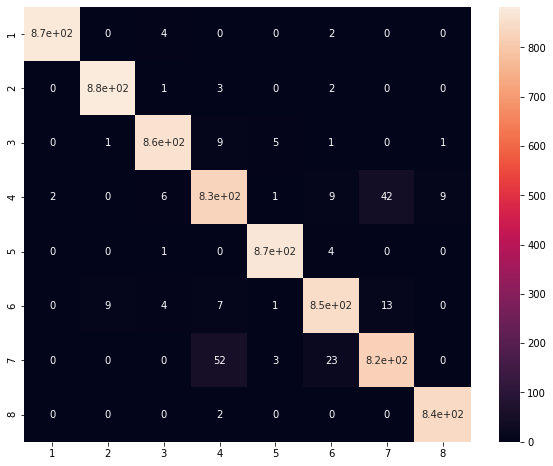

In [79]:
#confusion matrix
from sklearn.metrics import confusion_matrix
    
#confusion matrix   
cm_sgd = confusion_matrix(y_test, y_results_SGD)
array = cm_sgd
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)


In [80]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_sgd = accuracy_score(y_test, y_results_SGD)
print("accuracy:{}".format(accuracy_sgd))
#F1 score    
f1_score_sgd = f1_score(y_test, y_results_SGD, average='weighted')
print("f1_score:{}".format(f1_score_sgd))
#Recall score
recall_score_sgd = recall_score(y_test, y_results_SGD, average='micro')
print("recall_score:{}".format(recall_score_sgd))
#Precision score
precision_score_sgd = precision_score(y_test, y_results_SGD, average='micro')
print("precision_score:{}".format(precision_score_sgd))

accuracy:0.9691761363636363
f1_score:0.9691040520291064
recall_score:0.9691761363636363
precision_score:0.9691761363636363


In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_SGD, digits = 8))

              precision    recall  f1-score   support

           1  0.99771429 0.99317406 0.99543900       879
           2  0.98878924 0.99324324 0.99101124       888
           3  0.98175599 0.98063781 0.98119658       878
           4  0.91897891 0.92307692 0.92102336       897
           5  0.98862344 0.99427918 0.99144324       874
           6  0.95393258 0.96149490 0.95769882       883
           7  0.93714286 0.91314031 0.92498590       898
           8  0.98824912 0.99762752 0.99291617       843

    accuracy                      0.96917614      7040
   macro avg  0.96939830 0.96958424 0.96946429      7040
weighted avg  0.96908653 0.96917614 0.96910405      7040



# 3. Logistic Regression Classifier

# Model Tuning

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

# Set the parameters by cross-validation
tuned_parameters = [{ "solver" : ['newton-cg'],"C" : [0.001, 0.01, 0.1, 1, 10, 100, 1000],"max_iter":[250,500,1000,1500,2000]}]
             

print("# Tuning hyper-parameters for Logistic Regression Classifier")
print()

clf = GridSearchCV(LogisticRegression(random_state = 0, max_iter = 1500), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for Logistic Regression Classifier

Best parameters set found on training set:

{'C': 0.1, 'max_iter': 250, 'solver': 'newton-cg'}

Grid scores on training set:

0.772 (+/-0.012) for {'C': 0.001, 'max_iter': 250, 'solver': 'newton-cg'}
0.772 (+/-0.012) for {'C': 0.001, 'max_iter': 500, 'solver': 'newton-cg'}
0.772 (+/-0.012) for {'C': 0.001, 'max_iter': 1000, 'solver': 'newton-cg'}
0.772 (+/-0.012) for {'C': 0.001, 'max_iter': 1500, 'solver': 'newton-cg'}
0.772 (+/-0.012) for {'C': 0.001, 'max_iter': 2000, 'solver': 'newton-cg'}
0.789 (+/-0.025) for {'C': 0.01, 'max_iter': 250, 'solver': 'newton-cg'}
0.789 (+/-0.025) for {'C': 0.01, 'max_iter': 500, 'solver': 'newton-cg'}
0.789 (+/-0.025) for {'C': 0.01, 'max_iter': 1000, 'solver': 'newton-cg'}
0.789 (+/-0.025) for {'C': 0.01, 'max_iter': 1500, 'solver': 'newton-cg'}
0.789 (+/-0.025) for {'C': 0.01, 'max_iter': 2000, 'solver': 'newton-cg'}
0.790 (+/-0.030) for {'C': 0.1, 'max_iter': 250, 'solver': 'newton-cg'}

In [89]:
#Best parameters set found on training set:
      #{'C': 0.1, 'max_iter': 250, 'solver': 'newton-cg'}
    
#Note:
#reason for dropping other solvers
        #‘lbfgs’,‘sag’,‘saga’ : during earlier grid searches these solvers could not converge for feasible max_iters values
        #‘liblinear’: ‘liblinear’ is limited to one-versus-rest schemes and is not suitable in handling handle multinomial loss
                       # so not used in this multi-class problem

# Training the Model with tuned parameters

In [100]:
# Training the Logistic Regression classfication model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg', max_iter= 250, random_state=0)
classifier_logreg.fit(X_train_ovr, y_train_ovr)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting on Test set

In [101]:
# Predicting the Test set results
y_results_logreg = classifier_logreg.predict(X_test)

In [102]:
print(np.concatenate((y_results_logreg.reshape(len(y_results_logreg),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evalation

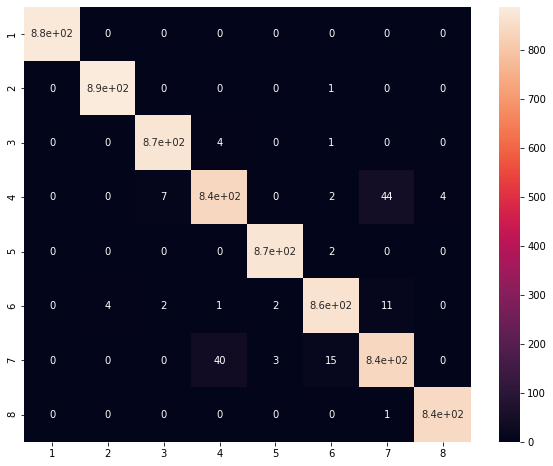

In [104]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_logreg = confusion_matrix(y_test, y_results_logreg)
array = cm_logreg 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [105]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_logreg = accuracy_score(y_test, y_results_logreg)
print("accuracy:{}".format(accuracy_logreg))
#F1 score    
f1_score_logreg = f1_score(y_test, y_results_logreg, average='weighted')
print("f1_score:{}".format(f1_score_logreg))
#Recall score
recall_score_logreg = recall_score(y_test, y_results_logreg, average='micro')
print("recall_score:{}".format(recall_score_logreg))
#Precision score
precision_score_logreg = precision_score(y_test, y_results_logreg, average='micro')
print("precision_score:{}".format(precision_score_logreg))

accuracy:0.9795454545454545
f1_score:0.9794936341056684
recall_score:0.9795454545454545
precision_score:0.9795454545454545


In [106]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_logreg, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99551066 0.99887387 0.99718943       888
           3  0.98979592 0.99430524 0.99204545       878
           4  0.94915254 0.93645485 0.94276094       897
           5  0.99429875 0.99771167 0.99600228       874
           6  0.97624434 0.97734994 0.97679683       883
           7  0.93750000 0.93541203 0.93645485       898
           8  0.99527187 0.99881376 0.99703967       843

    accuracy                      0.97954545      7040
   macro avg  0.97972176 0.97986517 0.97978618      7040
weighted avg  0.97945656 0.97954545 0.97949363      7040



# 4.KNN Classifier

# Model Tuning

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Set the parameters by cross-validation
tuned_parameters = [ {"metric":['euclidean'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']},
                     {"metric":['manhattan'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']},
                     {"metric":['chebyshev'], "n_neighbors":[5, 10, 20, 50, 100, 200, 250], "weights":['uniform','distance']}
                     ]
             

print("# Tuning hyper-parameters for KNN Classifier")
print()

clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='accuracy', cv = 2)

clf.fit(X_train, y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full training set.")
print("The scores are computed on the full development set.")
print()
y_true, y_pred = y_dev, clf.predict(X_dev)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for KNN Classifier

Best parameters set found on training set:

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Grid scores on training set:

0.726 (+/-0.070) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.727 (+/-0.064) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.727 (+/-0.066) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
0.728 (+/-0.062) for {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
0.728 (+/-0.070) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
0.729 (+/-0.065) for {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
0.724 (+/-0.069) for {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'uniform'}
0.725 (+/-0.068) for {'metric': 'euclidean', 'n_neighbors': 50, 'weights': 'distance'}
0.721 (+/-0.070) for {'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'uniform'}
0.722 (+/-0.069) for {'metric': 'eucl

In [ ]:
#Best parameters set found on training set:
     #{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

# Training the Model with tuned parameters

In [115]:
from sklearn.neighbors import KNeighborsClassifier
# Training the Logistic Regression classfication model on the Training set
classifier_knn = KNeighborsClassifier( metric = 'manhattan', n_neighbors = 5, weights= 'distance')
# fitting the model
classifier_knn.fit(X_train_ovr,y_train_ovr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

# Predicting results for Test set

In [116]:
# Predicting the Test set results
y_results_knn = classifier_knn.predict(X_test)

In [117]:
print(np.concatenate((y_results_knn.reshape(len(y_results_knn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [8 8]
 [8 8]
 [8 8]]


# Model Evaluation

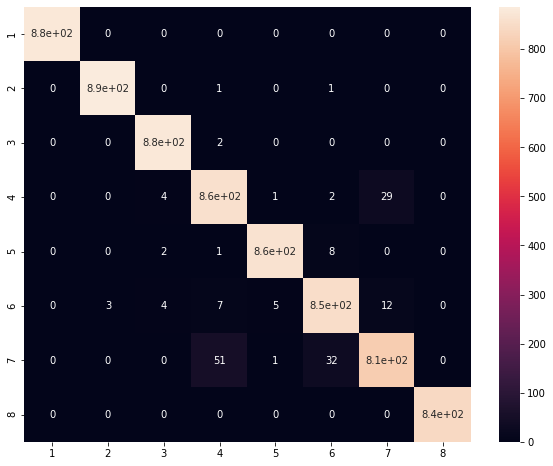

In [118]:
#Model Evalation For Logistic Regression Classification Model
from sklearn.metrics import confusion_matrix
    
#confusion matrix

cm_logreg = confusion_matrix(y_test, y_results_knn)
array = cm_logreg 
df_cm = pd.DataFrame(array, index = [i for i in "12345678"],
                  columns = [i for i in "12345678"])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True)

In [119]:
#accuracy_score, f1_score, recall_score,precision_score metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score
#accuracy
accuracy_logreg = accuracy_score(y_test, y_results_knn)
print("accuracy:{}".format(accuracy_logreg))
#F1 score    
f1_score_logreg = f1_score(y_test, y_results_knn, average='weighted')
print("f1_score:{}".format(f1_score_logreg))
#Recall score
recall_score_logreg = recall_score(y_test, y_results_knn, average='micro')
print("recall_score:{}".format(recall_score_logreg))
#Precision score
precision_score_logreg = precision_score(y_test, y_results_knn, average='micro')
print("precision_score:{}".format(precision_score_logreg))

accuracy:0.9764204545454546
f1_score:0.9763387227549893
recall_score:0.9764204545454546
precision_score:0.9764204545454546


In [120]:
#Classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_results_knn, digits = 8))

              precision    recall  f1-score   support

           1  1.00000000 1.00000000 1.00000000       879
           2  0.99662542 0.99774775 0.99718627       888
           3  0.98871332 0.99772210 0.99319728       878
           4  0.93282774 0.95986622 0.94615385       897
           5  0.99195402 0.98741419 0.98967890       874
           6  0.95195531 0.96489241 0.95838020       883
           7  0.95204678 0.90645880 0.92869367       898
           8  1.00000000 1.00000000 1.00000000       843

    accuracy                      0.97642045      7040
   macro avg  0.97676532 0.97676268 0.97666127      7040
weighted avg  0.97646627 0.97642045 0.97633872      7040



# SUMMARY

NOTES:
    1. Accuracy is a better metric in indicating the performance in this application as there is negligible class imbalance.
    2. GridSearchCV was used to search through parameters & get the best set of parameters for the above models.
    3. Modified train set i.e train set & dev set were created on which models with tuned parameters were trained.
    4. Finally prediction was done on test set.
    5. Accuracy obtained for different models are as follows:
              1. SVM Classifier --------------------> 99.289%
              2. SGD Classifier --------------------> 96.917%
              3. Logistics Regression Classifier ---> 97.954%
              4. KNN Classifier --------------------> 97.642% 